# Walkthrough COCOAPI (via super_pycocotools)

The super_pycocotools module aims to help manage multiple datasets. Instead of having a list of variables instantiating a dataset each, we propose a dataset management format with a ".json" file gathering all the information of each dataset and a super class that instantiates each dataset and each data type using pycocotools. So each partition of each dataset is accessible by instantiating a single variable

## imports

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from super_pycocotools.coco import COCO

## load data

In [2]:
super_ann_file = './datasets.json'

#initialize COCO api
coco = COCO(super_ann_file)

processing DeepFruits
train data
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
processing SIXray
train data
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
test data
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


## Information about datasets

In [3]:
coco.DeepFruits.infos

{'path': '/home/cose-ia/data/deepFruits',
 'nb_images': 457,
 'nb_classes': 7,
 'nb_instances': 2553}

## All pyococotools functions can be used on any dataset and any datatype

In [4]:
coco.DeepFruits.train.cats[4]

{'supercategory': 'avocado', 'id': 4, 'name': 'avocado'}

In [5]:
for key in coco.DeepFruits.train.imgs.keys():
    print(coco.DeepFruits.train.imgs[key])
    break

{'file_name': '1460105322_1756a2ed7f.png', 'height': 375, 'width': 500, 'id': 1}


In [6]:
im = coco.DeepFruits.train.loadImgs(99)[0]
im

{'file_name': 'n12761284_12973.png', 'height': 375, 'width': 500, 'id': 99}

In [7]:
data_dir = coco.DeepFruits.infos['path']
data_type = 'train2017'
image_path = '{}/{}/{}'.format(data_dir, data_type, im['file_name'])

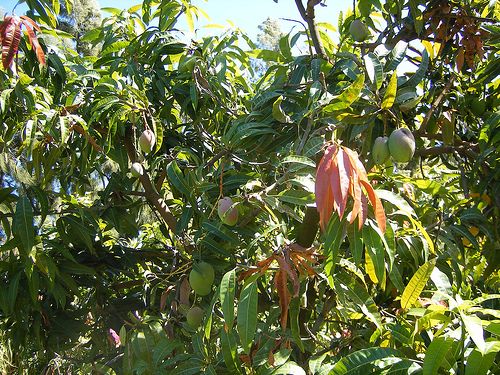

In [8]:
image = Image.open(image_path)
image

In [9]:
ann_ids = coco.DeepFruits.train.getAnnIds(imgIds=im['id'])
ann_ids

[489, 490, 491, 492, 493, 494]

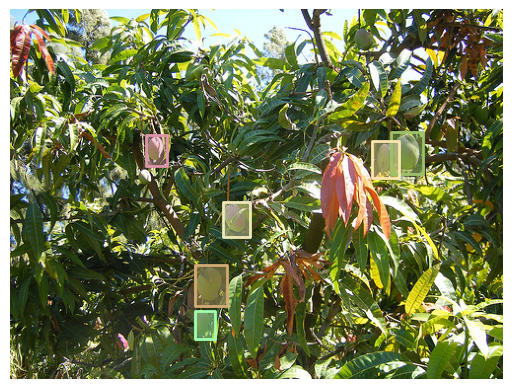

In [10]:
plt.imshow(image); plt.axis('off')
anns = coco.DeepFruits.train.loadAnns(ann_ids)
coco.SIXray.train.showAnns(anns, draw_bbox=True)

## Easy way to register dataset into detectron

You can register already instantiated datasets

In [11]:
coco.DeepFruits.register()

('DeepFruits_train',)

In [12]:
from detectron2.data.catalog import DatasetCatalog
DatasetCatalog.remove('DeepFruits_train')

coco.detectron_register()

[('DeepFruits_train',), ('SIXray_train', 'SIXray_test')]

Or register dataset without instantiate them

In [13]:
from super_pycocotools.detectron import register

DatasetCatalog.remove('DeepFruits_train')

register("DeepFruits", "datasets.json")

('DeepFruits_train',)